In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

# check the feature x
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the feature y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

#### In order to understand the data better it's good to visualize the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label":y})

In [6]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


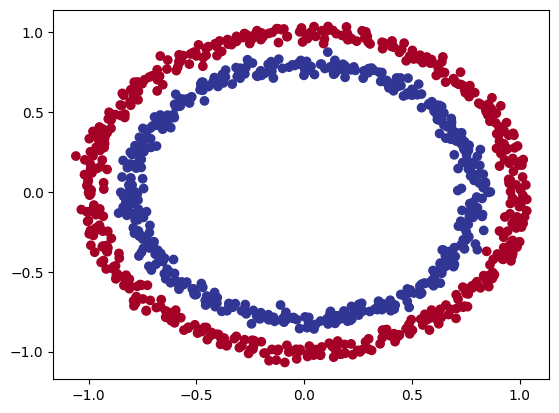

In [7]:
# Visualize using a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Steps in Modeling
1. Create the model
2. compile the model
3. fit the model
4. Evaluate the model
5. Tweak the model for better performance
6. Evaluate the model

In [8]:
# set the random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy'])

model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 6.1739 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.5676 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.9432 - accuracy: 0.4570
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.6722 - accuracy: 0.4710
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1820 - accuracy: 0.4720


In [9]:
model.fit(X,y,epochs=200, verbose=0)

In [10]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_2.fit(X,y,epochs=100, verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Create  a new model_3 to have a better model from last 2 models

In [13]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 2.5860 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4840
Epoch 11/

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5080


[0.6965078115463257, 0.5080000162124634]

In [15]:
model_3.predict(X)

32/32 [==============================] - 0s 870us/step


array([[0.484747  ],
       [0.5549084 ],
       [0.5585144 ],
       [0.55734974],
       [0.45808482],
       [0.5608967 ],
       [0.54305404],
       [0.48081326],
       [0.49148571],
       [0.5563442 ],
       [0.523601  ],
       [0.51638246],
       [0.54912686],
       [0.46482372],
       [0.4618622 ],
       [0.47520685],
       [0.54527044],
       [0.47813088],
       [0.54851043],
       [0.51613295],
       [0.49899924],
       [0.5714569 ],
       [0.47681808],
       [0.48718256],
       [0.573554  ],
       [0.5653644 ],
       [0.53505886],
       [0.46702075],
       [0.4718697 ],
       [0.46362513],
       [0.49443007],
       [0.5602467 ],
       [0.54125464],
       [0.46451193],
       [0.47747314],
       [0.57623893],
       [0.5612645 ],
       [0.51742965],
       [0.47237724],
       [0.50035477],
       [0.5128981 ],
       [0.5298466 ],
       [0.52207077],
       [0.46340936],
       [0.5314762 ],
       [0.5437541 ],
       [0.4623289 ],
       [0.530

### All of the preditctions are arround 0.5 but let's see this visually.

Lets create a plotting fuction called plot_decision_boundry(). This function will

1. Take in trained model, Feature X and labels y
2. create a meshGrid

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 964us/step


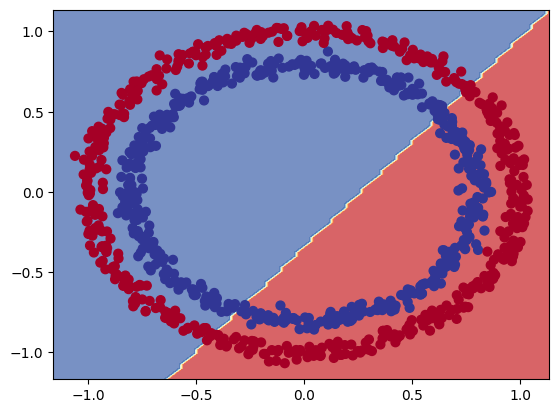

In [18]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [20]:
np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

[array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

## Lets see if our model can work with regression data

In [21]:
tf.random.set_seed(42)

X_regression = tf.range(1,1000, 5)
y_regression = tf.range(100,1100,5) 

# Relateion between X and Y is y = x + 100

# Lets split our data into test and train data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:] 

# Reshape input data for the model
# X_reg_train = tf.reshape(X_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)
# y_reg_train = tf.reshape(y_reg_train, (-1, 1))  # Reshape to (batch_size, input_shape)


In [22]:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

#### We have compiled our model for a classification problem now we are dealing with regression problem, lets create a model to work with our regression data

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=600)

Epoch 1/600
5/5 [==============================] - 1s 3ms/step - loss: 515.1393 - mae: 515.1393
Epoch 2/600
5/5 [==============================] - 0s 1ms/step - loss: 381.9667 - mae: 381.9667
Epoch 3/600
5/5 [==============================] - 0s 2ms/step - loss: 253.6002 - mae: 253.6002
Epoch 4/600
5/5 [==============================] - 0s 2ms/step - loss: 119.9756 - mae: 119.9756
Epoch 5/600
5/5 [==============================] - 0s 2ms/step - loss: 56.2205 - mae: 56.2205
Epoch 6/600
5/5 [==============================] - 0s 2ms/step - loss: 92.8656 - mae: 92.8656
Epoch 7/600
5/5 [==============================] - 0s 2ms/step - loss: 69.7131 - mae: 69.7131
Epoch 8/600
5/5 [==============================] - 0s 2ms/step - loss: 44.2227 - mae: 44.2227
Epoch 9/600
5/5 [==============================] - 0s 3ms/step - loss: 48.4391 - mae: 48.4391
Epoch 10/600
5/5 [==============================] - 0s 3ms/step - loss: 41.9136 - mae: 41.9136
Epoch 11/600
5/5 [==============================] -

In [24]:
y_reg_pred = model_4.predict(X_reg_test)

2/2 [==============================] - 0s 2ms/step


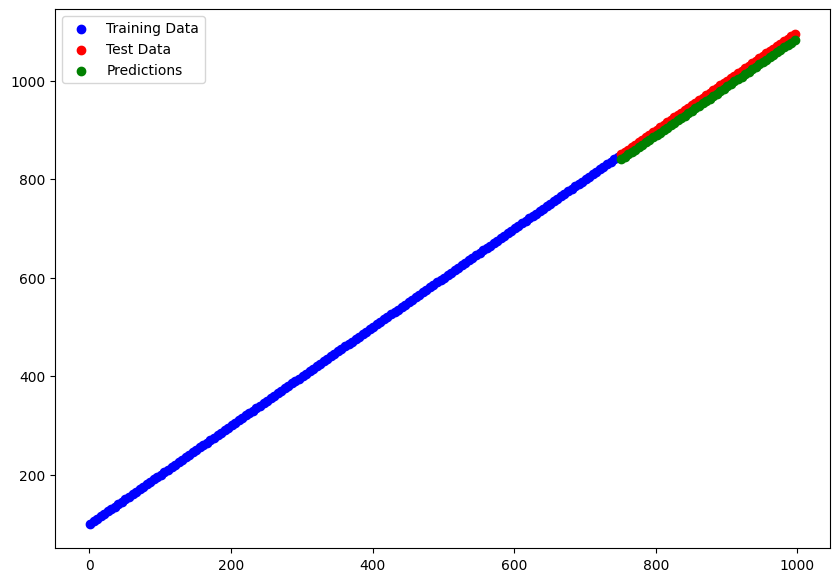

In [25]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b", label="Training Data")
plt.scatter(X_reg_test,y_reg_test, c='r', label="Test Data")
plt.scatter(X_reg_test,y_reg_pred, c='g', label="Predictions")
plt.legend()

## Non-Linearity

In [26]:
tf.random.set_seed(42)

# 1. Create a model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.9306 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9240 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9194 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9166 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8985 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8917 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8891 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8780 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8755 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8737 - accuracy: 0.4820
Epoch 11/

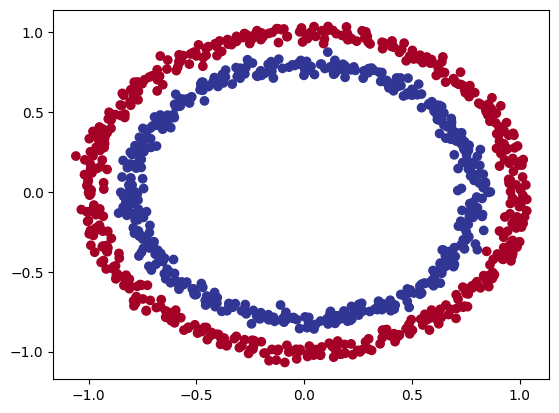

In [27]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 759us/step


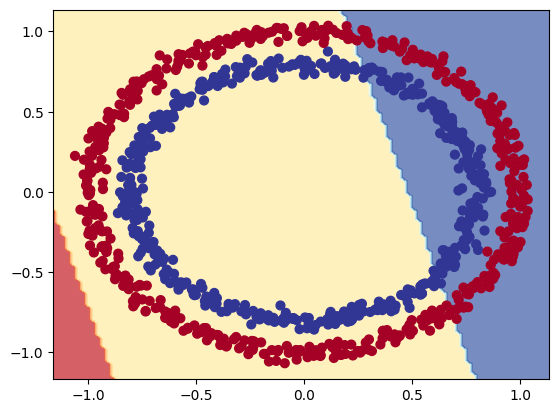

In [28]:
plot_decision_boundary(model_5,X,y)

# Lets build our first with a non-linear activation function

In [29]:
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save history
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3330 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2398 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1783 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0662 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9040 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7632 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7451 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6897 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6227 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5374 - accuracy: 0.5000
Epoch 11/

## Now lets create a new model with more hidden layers and using a Non linear activation fucntion

In [30]:
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the history
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 1.3541 - accuracy: 0.4800
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 1.1127 - accuracy: 0.4720
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 1.0246 - accuracy: 0.4690
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.9667 - accuracy: 0.4690
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.9212 - accuracy: 0.4650
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8839 - accuracy: 0.4600
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8516 - accuracy: 0.4600
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8259 - accuracy: 0.4580
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8040 - accuracy: 0.4520
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7867 - accuracy: 0.4390
Epoch 11/

313/313 [==============================] - 0s 788us/step


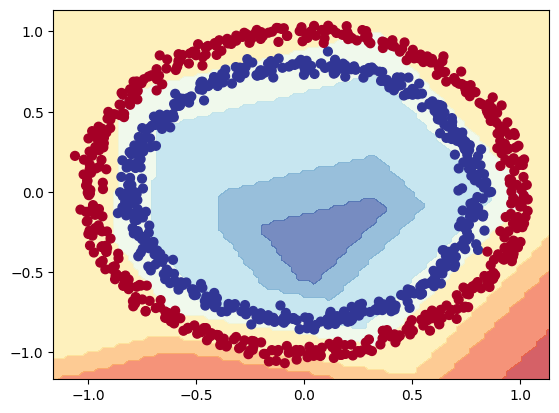

In [31]:
plot_decision_boundary(model_7, X,y)

In [32]:
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model and save the results 
history = model_8.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5090
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5130
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5150
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5170
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5210
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5250
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5330
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5300
Epoch 11/

In [33]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9960


[0.049028877168893814, 0.9959999918937683]

313/313 [==============================] - 0s 809us/step


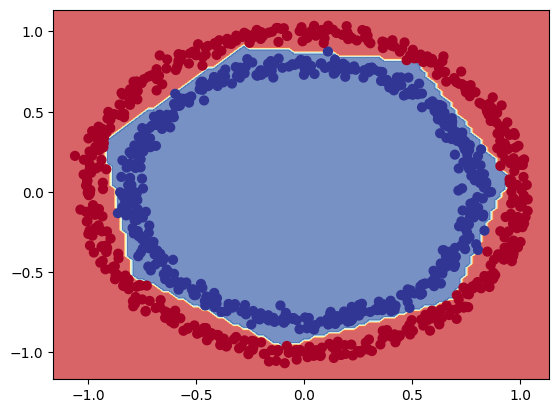

In [34]:
plot_decision_boundary(model_8,X,y)

# Create a toy tensor ( similar to our data  we passed into our model)

In [35]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

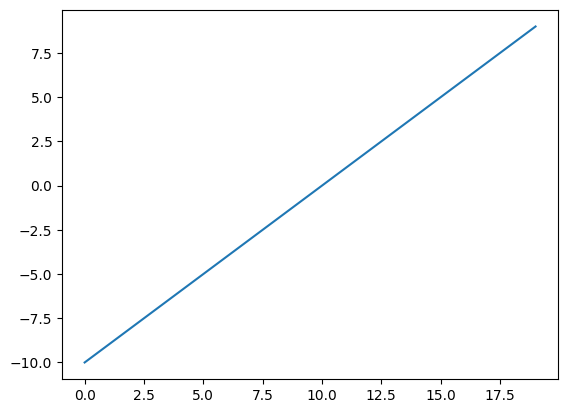

In [36]:
plt.plot(A)

In [37]:
# let's replicate our sigmoid activation function

def sigmoid(X):
    return 1 / (1 + tf.exp(-X))

sigmoid(X)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[0.68010323, 0.55761316],
       [0.31948079, 0.5382399 ],
       [0.3067427 , 0.54321243],
       ...,
       [0.46582826, 0.30788798],
       [0.66158411, 0.31701982],
       [0.56980526, 0.72388687]])>

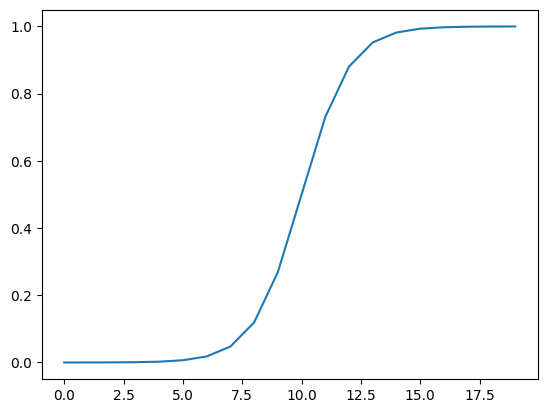

In [38]:
plt.plot(sigmoid(A))

In [39]:
# Lets recreate the Relu activation function
def relu(x):
    '''If the value is negetive it returns 0. If the value is Positive it returns 1'''
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [40]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

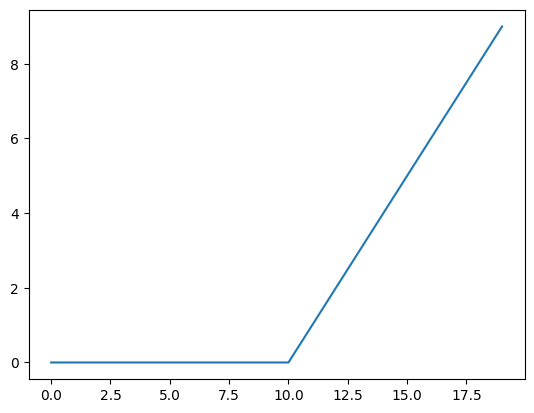

In [41]:
plt.plot(relu(A))

## Lets split our data into train and test set for validating the model performance

In [49]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [43]:
# Getting great results in less time by tweaking the learning rate

# set the random seed
tf.random.set_seed(42)

# 1. Create the Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model and save the results 
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5175
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5250
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5562
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5638
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5400
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.5525
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.5775
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6112
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.7613
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.8062
Epoch 11/25
25/25 [

In [44]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9950


[0.05481370911002159, 0.9950000047683716]

313/313 [==============================] - 0s 711us/step


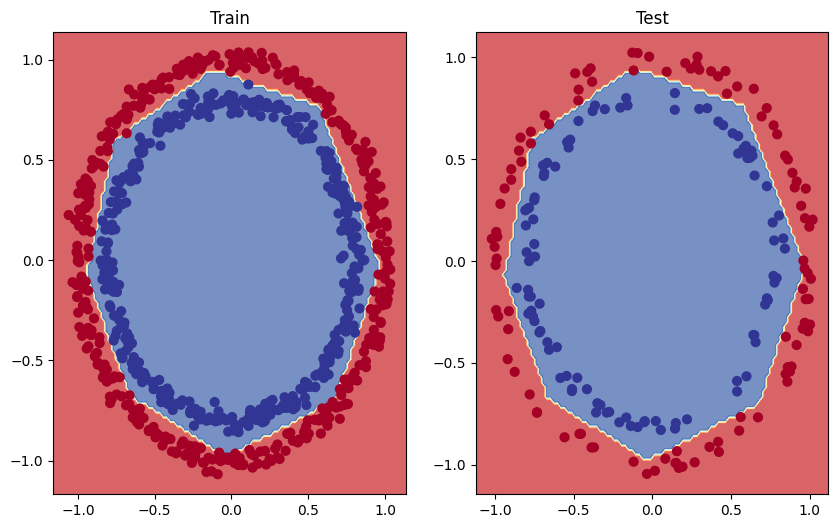

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)

### Lets Look into Our history object

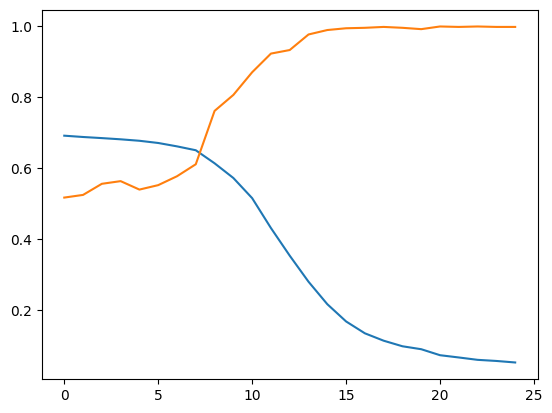

In [46]:
plt.plot(pd.DataFrame(history.history))

## Implementing a Learning rate callback

In [53]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train,y_train, epochs=100,
                          callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Epochs'>

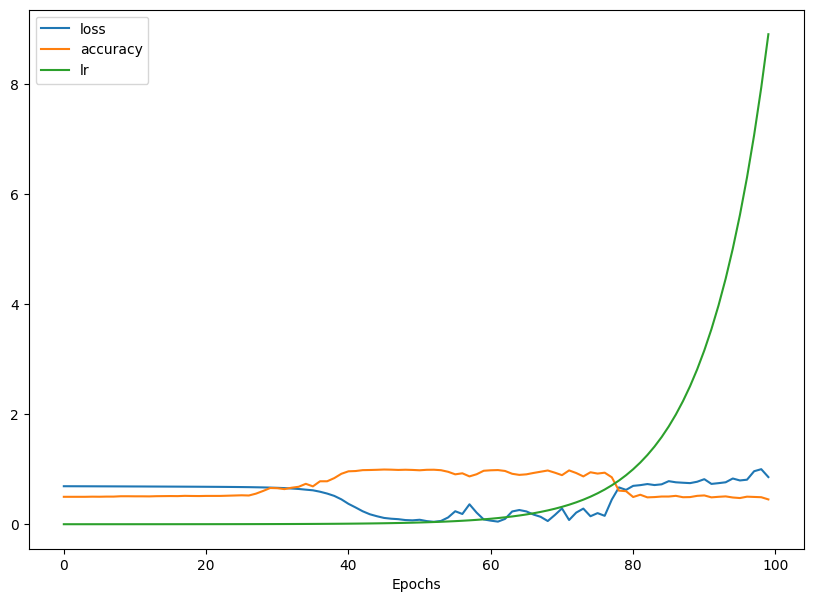

In [55]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="Epochs")

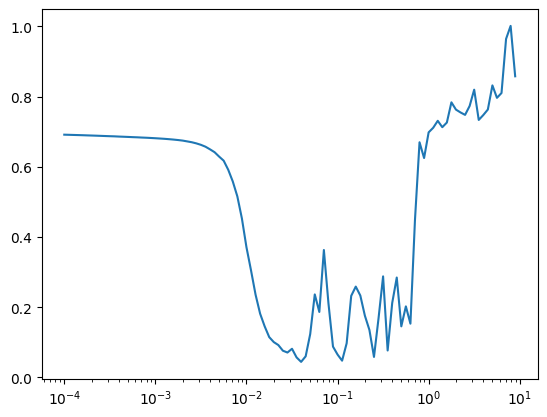

In [64]:
# Plot the learning rate vs the loss
lrs = 1e-4 * ( 10**(tf.range(100)/20))
plt.semilogx(lrs,history_10.history['loss'])

In [ ]:
""